In [237]:
import numpy as np
import pandas as pd
import h5py
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
from PIL import Image
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

### Loading the dataset

In [238]:
def load_dataset():
    train_data = h5py.File('datasets/train_catvnoncat.h5','r')
    train_data.visit(print)
    classes = train_data['list_classes'].value
    train_set_x = np.array(train_data['train_set_x'].value)
    train_set_y = np.array(train_data['train_set_y'].value)
    test_data = h5py.File('datasets/test_catvnoncat.h5','r')
    test_data.visit(print)
    test_set_x = np.array(test_data['test_set_x'].value)
    test_set_y = np.array(test_data['test_set_y'].value)
    return train_set_x,train_set_y,test_set_x,test_set_y,classes

In [239]:
train_x,train_y,test_x,test_y,classes = load_dataset()

list_classes
train_set_x
train_set_y
list_classes
test_set_x
test_set_y


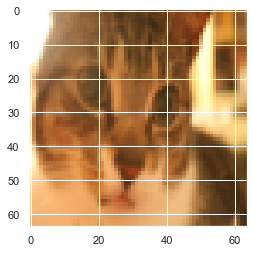

In [247]:
index = 200
plt.imshow(train_x[index])

In [140]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


In [141]:
train_exp = train_x.shape[0]
test_exp = test_x.shape[0]
height,width = train_x[15].shape[0],train_x[15].shape[1]

print('Number of training examples :{0}'.format(train_exp))
print('Number of testing example are : {0}'.format(test_exp))
print('height and width of each image : {0} : {1}'.format(height,width))

Number of training examples :209
Number of testing example are : 50
height and width of each image : 64 : 64


### Reshaping the images 

In [142]:
train_x = train_x.reshape(train_x.shape[0],-1).T
test_x = test_x.reshape(test_x.shape[0],-1).T

print(train_x.shape)
print(test_x.shape)

(12288, 209)
(12288, 50)


In [143]:
train_x = train_x/255
test_x = test_x/255

In [144]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [145]:
def initialize_parameters(dim):
    w = np.zeros((dim,1))
    b = 0
    
    return w,b

In [146]:
def propagate(w,b,x,y):    
    m = x.shape[1]
    
    z = np.dot(w.T,x)+b
    A = sigmoid(z)
    
    cost = (-1/m)*np.sum((y*np.log(A) + (1-y)*(np.log(1-A))))
    dw = (1/m)*np.dot(x,np.subtract(A,y).T)
    db = (1/m)*np.sum(A-y)
    
    grads = {'dw':dw,'db':db}
    
    return grads,cost

In [147]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([1,0,1])
w,b = initialize_parameters(x.shape[0])
print(propagate(w,b,x,y))

({'dw': array([[-0.33333333],
       [-0.83333333]]), 'db': -0.16666666666666666}, 0.6931471805599452)


In [148]:
def optimize(w,b,x,y,num_iterations,learning_rate,print_cost):
    m=x.shape[1]
    costs = []
    for i in range(num_iterations):
        
        grads,cost = propagate(w,b,x,y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        if i%100 == 0:
            costs.append(cost)
        if print_cost and i%100 == 0:
            print('cost at iteration {0} is {1}'.format(i,cost))
        
        parameters = {'w':w,'b':b}
    return parameters,costs

In [168]:
def predict(w,b,x):
    m = x.shape[1]
    y = np.zeros((1,x.shape[1]))
    w = w.reshape(x.shape[0],1)
    
    A = sigmoid(np.dot(w.T,x)+b)
    
    for i in range(A.shape[1]):
        if A[0,i]<=0.5:
            y[0,i] = 0
        elif A[0,i]>0.5:
            y[0,i] = 1
    return y

In [187]:
def model(train_x,train_y,test_x,test_y,num_iterations,learning_rate,print_cost):
    w,b = initialize_parameters(train_x.shape[0])
    
    parameters,costs = optimize(w,b,train_x,train_y,num_iterations,learning_rate,print_cost)
    
    w = parameters['w']
    b = parameters['b']
    
    test_predict = predict(w,b,test_x)
    train_predict = predict(w,b,train_x)
    
    print("train_accuracy = {}%".format(100 - np.mean(np.abs(train_predict - train_y))*100))
    print("test_accuracy = {}%".format(100 - np.mean(np.abs(test_predict - test_y))*100))
    
    d = {'w':w,
        'b':b,
        'learning_rate':learning_rate,
        'number_iterations':num_iterations,
        'train_predict':train_predict,
        'test_predict':test_predict,
        'costs':costs}
    return d

In [227]:
d = model(train_x,train_y,test_x,test_y,num_iterations=2000,learning_rate=0.005,print_cost=True)

cost at iteration 0 is 0.6931471805599453
cost at iteration 100 is 0.5845083636993086
cost at iteration 200 is 0.46694904094655476
cost at iteration 300 is 0.37600686694802077
cost at iteration 400 is 0.3314632893282513
cost at iteration 500 is 0.30327306747438293
cost at iteration 600 is 0.2798795865826048
cost at iteration 700 is 0.26004213692587574
cost at iteration 800 is 0.24294068467796623
cost at iteration 900 is 0.22800422256726066
cost at iteration 1000 is 0.21481951378449635
cost at iteration 1100 is 0.20307819060644985
cost at iteration 1200 is 0.1925442771670686
cost at iteration 1300 is 0.18303333796883503
cost at iteration 1400 is 0.17439859438448876
cost at iteration 1500 is 0.16652139705400335
cost at iteration 1600 is 0.15930451829756614
cost at iteration 1700 is 0.15266732471296504
cost at iteration 1800 is 0.1465422350398234
cost at iteration 1900 is 0.14087207570310162
train_accuracy = 99.04306220095694%
test_accuracy = 70.0%


Text(0.5, 1.0, 'graph')

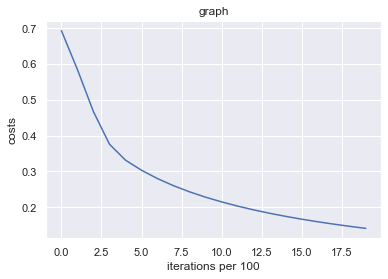

In [215]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('costs')
plt.xlabel('iterations per 100')
plt.title('graph')

at learning rate 0.01
train_accuracy = 99.52153110047847%
test_accuracy = 70.0%
---------------------------------------------------------------------
at learning rate 0.001
train_accuracy = 91.38755980861244%
test_accuracy = 68.0%
---------------------------------------------------------------------
at learning rate 0.0001
train_accuracy = 71.29186602870814%
test_accuracy = 40.0%
---------------------------------------------------------------------


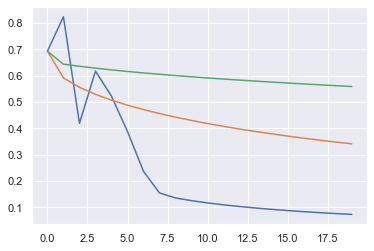

In [204]:
learning_rates = [0.01,0.001,0.0001]
models = {}
for i in learning_rates:
    print('at learning rate {}'.format(i))
    models[str(i)] = model(train_x,train_y,test_x,test_y,num_iterations=2000,learning_rate=i,print_cost=False)
    print('---------------------------------------------------------------------')
for i in learning_rates:
    plt.plot(models[str(i)]['costs'],label = models[str(i)]['learning_rate'])

algorithm predicted your image as a: 
cat image


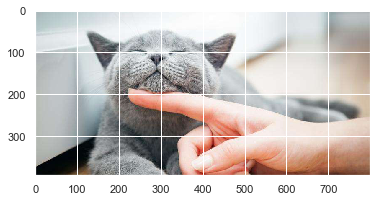

In [234]:
my_image = 'human3.jpg'

image = np.array(ndimage.imread(my_image,flatten=False))
image = image/255
my_image = scipy.misc.imresize(image,size=(height,width)).reshape((height*width*3,1))
my_predict = predict(d['w'],d['b'],my_image)
plt.imshow(image)

print('algorithm predicted your image as a: ')
print('cat image' if my_predict==1 else 'not cat image')